# Four Insights on Automatic Chord Estimation

Visualization code accompanying the ISMIR 2015 submission.

In [1]:
# Imports and config
from __future__ import print_function
from collections import OrderedDict
import glob
import numpy as np
import pandas as pd
import sys
import tabulate

# Viz & beautification
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
import seaborn
seaborn.set()
mpld3.enable_notebook()
np.set_printoptions(precision=4)
from IPython.display import display, HTML 

# Convenience code
import mir_eval
import ace_tools

In [2]:
folds = range(5)
splits = ['train', 'test']
partitions = ['all', 'v157_strict', 'v157_others']
metrics = ['triads', 'root', 'v157_strict', 'mirex', 
           'tetrads', 'sevenths', 'thirds', 'majmin']
# Sorted by occurence in the data
quals = ['C:maj', 'C:min', 'C:7', 'C:min7', 'N', 'C:maj7', 'C:maj6',
         'C:sus4', 'C:sus2', 'C:aug', 'C:dim', 'C:min6','C:hdim7', 'C:dim7']
FIGSIZE = (8, 8)
SAVE_FIGS = False

## Comparative Analysis

In [3]:
# Caution! This takes a bit of time...
all_jams = ace_tools.load_jamset_v2("data/chord_dataset/annotations/references/all.jv2")
DNN_test_jams = ace_tools.load_jamset_v2("data/chord_dataset/annotations/DNN/test.jv2")
kHMM_test_jams = ace_tools.load_jamset_v2("data/chord_dataset/annotations/kHMM/test.jv2")

### Unfiltered references vs DNN Model

In [4]:
all_DNN_test, all_DNN_test_W = ace_tools.util.load_results("data/chord_dataset/results/DNN/all_DNN_test.json")
all_DNN_test.sort_index(inplace=True)
all_DNN_test_W.sort_index(inplace=True)

DNN_train_fmt = "data/chord_dataset/results/DNN/all_DNN_train{0}.json"
all_DNN_trains = [ace_tools.util.load_results(DNN_train_fmt.format(i))[0].sort_index()
                  for i in range(5)]

In [5]:
# Training fold 0
all_DNN_trains[0].sort(columns=['root', 'thirds'])[:4]

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
TRVVMUA149E3780587,0.035117,0.035117,0.032927,0.035117,0.032927,0.032927,0.032927,0.044356
TRTZUVU149E3A608E6,0.038609,0.038609,0.038609,0.038609,0.038609,0.038609,0.038609,0.038609
TRXSYHH149E3BCB688,0.111466,0.122276,0.202802,0.111466,0.111466,0.116009,0.111466,1.000000
TRDQBXM149E327CDF6,0.347599,0.237230,0.210360,0.427151,0.210360,0.210360,0.210360,1.000000


In [6]:
# Combined test split
all_DNN_test.sort(columns=['root', 'thirds'])[:4]

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
TRTQXNW149E3BE2A97,0.010210,0.010210,0.010210,0.010210,0.010210,0.010210,0.010210,0.010210
TRTJURA149E3ED1B15,0.018764,0.018764,0.018764,0.018764,0.018764,0.018764,0.018764,0.019603
TRBTTXD149E3CB5743,0.020036,0.016005,0.029504,0.020036,0.015858,0.015858,0.015858,0.020250
TRYUBWJ149E3E650A6,0.035202,0.032560,0.032157,0.035489,0.032020,0.032020,0.032020,0.040049


### Unfiltered References vs kHMM Model

In [7]:
all_kHMM_test, all_kHMM_test_W = ace_tools.util.load_results("data/chord_dataset/results/kHMM/all_kHMM_test.json")
all_kHMM_test.sort_index(inplace=True)
all_kHMM_test_W.sort_index(inplace=True)

kHMM_train_fmt = "data/chord_dataset/results/kHMM/all_kHMM_train{0}.json"
all_kHMM_trains = [ace_tools.util.load_results(kHMM_train_fmt.format(i))[0].sort_index()
                   for i in range(5)]

In [8]:
# Training fold 0
all_kHMM_trains[0].sort(columns=['root', 'thirds'])[:4]

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
TRBTTXD149E3CB5743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TRFZJJT149E33CFCFF,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911
TRTQXNW149E3BE2A97,0.012291,0.012291,0.012291,0.012291,0.012291,0.012291,0.012291,0.012291
TRHPTPU149E3CF2AEA,0.025618,0.025618,0.020395,0.025618,0.020395,0.020395,0.020395,0.025618


### Compare performance on test data between models

In [9]:
# Sanity check that the results tables are aligned.
assert (all_kHMM_test.index == all_DNN_test.index).all()

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


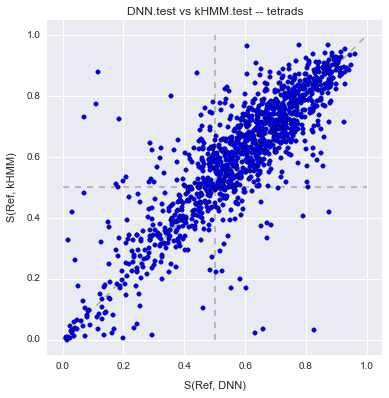

In [10]:
metric = 'tetrads'
X, Y = all_DNN_test[metric], all_kHMM_test[metric]
fig, ax = ace_tools.visualize.trackwise_scatter(X, Y, figsize=(6, 6), voffset=50)
ax.set_title("DNN.test vs kHMM.test -- {0}".format(metric))
ax.set_xlabel("S(Ref, DNN)")
ax.set_ylabel("S(Ref, kHMM)")

**Analysis**
* Points below $x=y$ favor DNN; points above x=y favor kHMM.
* Quadrant I -- $(x > 0.5, y > 0.5)$: Both models do well
* Quadrant II -- $(x < 0.5, y > 0.5)$: kHMM outperforms DNN
* Quadrant III -- $(x < 0.5, y < 0.5)$: Both models fail
* Quadrant IV -- $(x > 0.5, y < 0.5)$: DNN outperforms kHMM

### Compare estimations between models

In [11]:
# Load previously computed results and corresponding supports (weights) for each measure.

# S(DNN, kHMM)
DNN_kHMM_test, DNN_kHMM_test_W = ace_tools.util.load_results(
    "data/chord_dataset/results/kHMM/DNN_kHMM_test.json")
DNN_kHMM_test.sort_index(inplace=True)
DNN_kHMM_test_W.sort_index(inplace=True)

# S(kHMM, DNN)
kHMM_DNN_test, kHMM_DNN_test_W = ace_tools.util.load_results(
    "data/chord_dataset/results/DNN/kHMM_DNN_test.json")
kHMM_DNN_test.sort_index(inplace=True)
kHMM_DNN_test_W.sort_index(inplace=True)

In [12]:
# Basically 1:1 between human-machine, and machine-machine; no need to plot.
ave_res = pd.concat([(all_DNN_test * all_DNN_test_W).sum() / all_DNN_test_W.sum(), 
                     (all_kHMM_test * all_kHMM_test_W).sum() / all_kHMM_test_W.sum(), 
                     (kHMM_DNN_test * kHMM_DNN_test_W).sum() / kHMM_DNN_test_W.sum(), 
                     (DNN_kHMM_test * DNN_kHMM_test_W).sum() / DNN_kHMM_test_W.sum()], axis=1)
# print(ave_res.to_latex(float_format="{:0.4f}".format))
HTML(ave_res.to_html(float_format="{:0.4f}".format))

,0,1,2,3
majmin,0.7589,0.7761,0.7980,0.8136
mirex,0.7691,0.7832,0.8061,0.8060
root,0.7894,0.8075,0.8398,0.8397
sevenths,0.6197,0.6448,0.6913,0.7186
tetrads,0.5672,0.5880,0.6779,0.6778
thirds,0.7570,0.7747,0.8148,0.8148
triads,0.7048,0.7205,0.7827,0.7827
v157_strict,0.6493,0.6593,0.6779,0.6778


### Compare agreement between models and humans (Test)

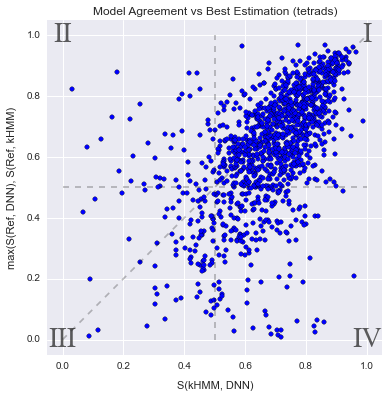

In [13]:
# Model agreement vs bestimation 
# S(kHMM, DNN) vs max(S(Ref, DNN), S(Ref, kHMM))
metric = 'tetrads'
X = kHMM_DNN_test[metric]
Ya, Yb = all_DNN_test[metric], all_kHMM_test[metric]
Y = pd.concat([Ya, Yb], axis=1).max(axis=1)

fig, ax = ace_tools.visualize.trackwise_scatter(X, Y, figsize=(6,6), voffset=50)
ax.set_title("Model Agreement vs Best Estimation ({0})".format(metric))
ax.set_xlabel("S(kHMM, DNN)")
ax.set_ylabel("max(S(Ref, DNN), S(Ref, kHMM)")
for n, l in enumerate(['I', 'II', 'III', 'IV']):
    ax.text(((n - 1) / 2) % 2, 1 - n/2, l, va='center', ha='center', 
            fontsize=28, fontname='Times New Roman', alpha=0.75)
if SAVE_FIGS:
    fig.savefig("paper/figs/model_agreement-vs-best_est.pdf",
                transparent=False)

In [14]:
quad1_idx = (X > 0.5) & (Y > 0.5)
quad2_idx = (X < 0.5) & (Y > 0.5)
quad3_idx = (X < 0.5) & (Y < 0.5)
quad4_idx = (X > 0.5) & (Y < 0.5)

np.array([i.mean() for i in quad1_idx, quad2_idx, quad3_idx, quad4_idx])[1:].sum()

0.25308134757600659

## Visualizing Chord Sequences

In [15]:
def draw_gt_triple(key, vocab='soft', save_fig=False, out_dir='paper/figs'):
    key = filter(lambda x:x.startswith(key), all_jams.keys())[0]
    
    stats = pd.DataFrame([all_DNN_test.ix[key], all_kHMM_test.ix[key]], index=['DNN', 'kHMM'])
    display(HTML(stats.to_html()))

    title = "{artist} - {title}".format(**all_jams[key].file_metadata)
    title = "<untitled>" if title == ' - ' else title
    annots = [all_jams[key].annotations[0], DNN_test_jams[key].annotations[0], 
              kHMM_test_jams[key].annotations[0]]
    figs = ace_tools.visualize.plot_annotations(
        annots, ['Ref', 'DNN', 'kHMM'], (12, 3), (12, 1), 
        vocab=vocab, title=title)

    if save_fig: 
        figs[0].savefig("{0}/{1}_annotations.pdf".format(out_dir, key),
                        transparent=True)
        figs[1].savefig("{0}/{1}_legend.pdf".format(out_dir, key),
                        transparent=True)

        with open("{0}/{1}_meta.json".format(out_dir, key), 'w') as fp:
            json.dump(dict(stats=stats.to_dict()), fp, indent=2)

### Quad IV

In [16]:
x, y = X.ix[quad3_idx], Y.ix[quad3_idx]
Z = 2 * x * y / (x + y)
Z.sort(inplace=True, ascending=True)

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.682055,0.575228,0.657626,0.524297,0.379286,0.609213,0.562897,0.441901
kHMM,0.568391,0.513645,0.563155,0.467476,0.323092,0.508141,0.470749,0.376430


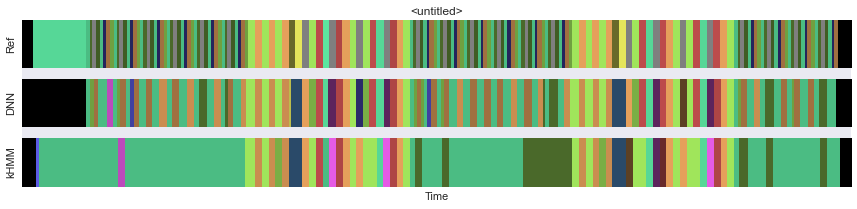

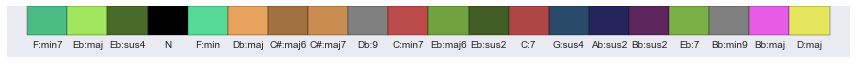

In [17]:
draw_gt_triple('TRQU')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.035117,0.035117,0.032927,0.035117,0.032927,0.032927,0.032927,0.044356
kHMM,0.032730,0.032730,0.030689,0.032730,0.030689,0.030689,0.030689,0.041341


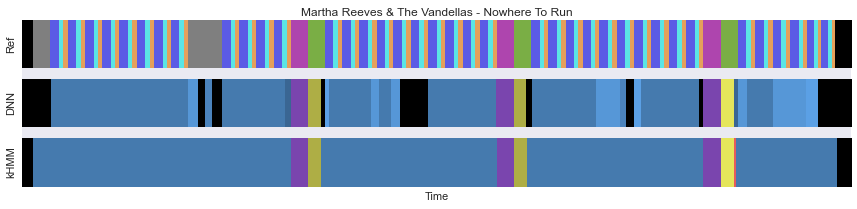

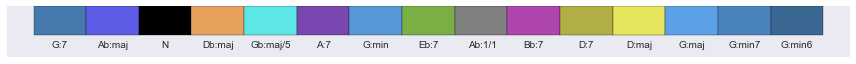

In [18]:
draw_gt_triple('TRVVMUA149E3780587')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,1.000000,1.000000,0.939511,1.000000,0.009780,0.492989,0.009780,1.000000
kHMM,0.574491,0.574491,0.850091,0.574491,0.005618,0.500914,0.005618,0.574491


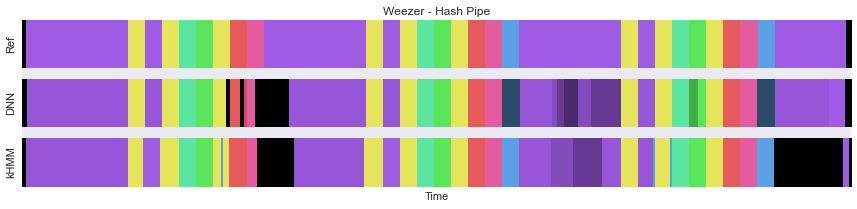

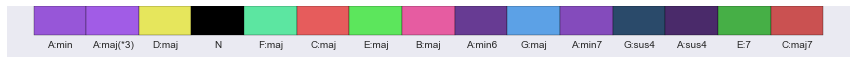

In [19]:
# Quad III
draw_gt_triple('TRPBII')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.886524,0.886524,0.886524,0.824864,0.824864,0.886524,0.886524,0.824864
kHMM,0.030847,0.030847,0.030847,0.030847,0.030847,0.030847,0.030847,0.030847


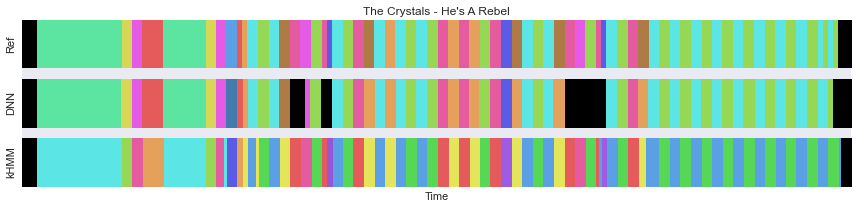

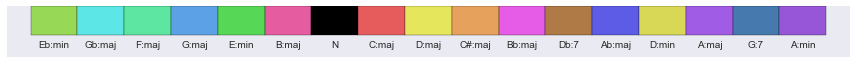

In [20]:
# Quad IV
draw_gt_triple('TRPRZWQ149E3B51161')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.817524,0.857118,0.889197,0.070690,0.070690,0.817524,0.817524,0.869217
kHMM,0.804310,0.804310,0.864683,0.730065,0.730065,0.804310,0.804310,0.719981


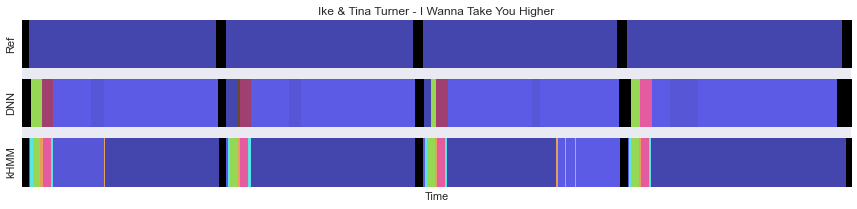

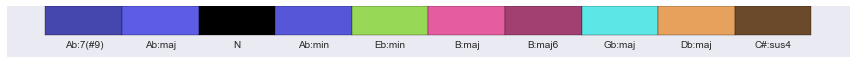

In [21]:
# Quad II
draw_gt_triple('TRIKLPN')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.988189,0.988189,0.738487,0.988189,0.040784,0.575392,0.040784,0.988189
kHMM,0.911847,0.911847,0.601719,0.911847,0.037633,0.474040,0.037633,0.911847


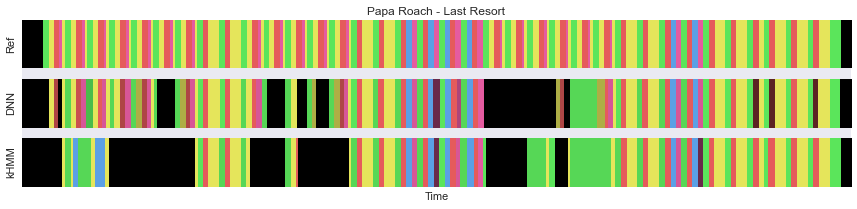

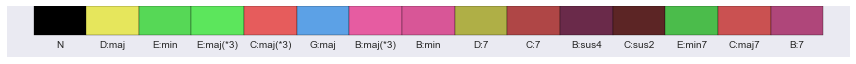

In [22]:
# Quad III
draw_gt_triple('TRIJZ')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.513734,0.445845,0.696699,0.335772,0.130377,0.620527,0.199477,0.505638
kHMM,0.526600,0.456961,0.679958,0.170311,0.066130,0.674234,0.204473,0.195739


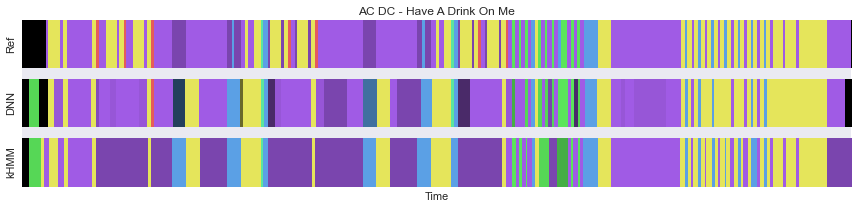

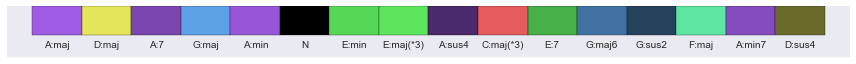

In [23]:
# Quad III
draw_gt_triple('TRXZZNU')

**Analysis**
* Points below $x=y$ occur when the models agree more with each other than the reference.
* Quadrant I -- $(x > 0.5, y > 0.5)$: Everyone agrees.
* Quadrant II -- $(x < 0.5, y > 0.5)$: One model matches the reference better than the other.
* Quadrant III -- $(x < 0.5, y < 0.5)$: Everyone disagrees.
* Quadrant IV -- $(x > 0.5, y < 0.5)$: Models agree more than either with the reference.

In [24]:
# Determine the ratio of the data that lives in each quadrant.
quad1_idx = (X > 0.5) & (Y > 0.5)
quad2_idx = (X < 0.5) & (Y > 0.5)
quad3_idx = (X < 0.5) & (Y < 0.5)
quad4_idx = (X > 0.5) & (Y < 0.5)

print(["{0:0.4f}".format(sum(i)/float(len(X)))
       for i in quad1_idx, quad2_idx, quad3_idx, quad4_idx])

['0.7469', '0.0386', '0.0723', '0.1422']


,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.656871,0.693888,0.739292,0.478624,0.447179,0.699378,0.600714,0.509016
kHMM,0.708461,0.657443,0.744729,0.491444,0.423310,0.697850,0.610240,0.467976


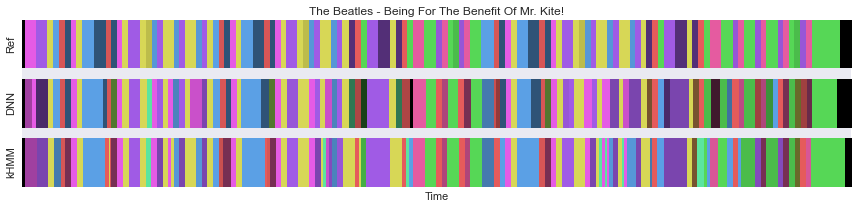

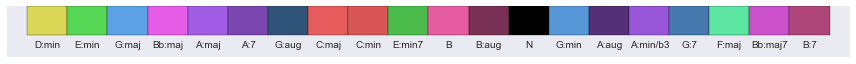

In [25]:
# Quad III
draw_gt_triple('TROOZR')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.169281,0.169281,0.131657,0.169281,0.029595,0.131657,0.029595,0.169281
kHMM,0.189455,0.189455,0.820381,0.189455,0.033122,0.710758,0.033122,0.189455


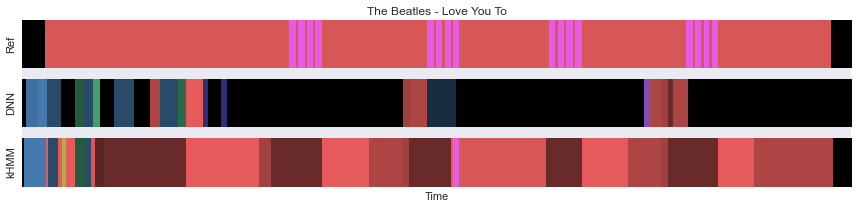

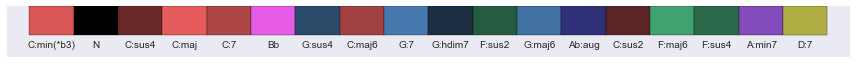

In [26]:
# Quad III
draw_gt_triple('TRGYRTH')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.199891,0.199891,0.204815,0.204656,0.199891,0.199891,0.199891,0.202242
kHMM,0.012569,0.012569,0.015370,0.006982,0.006820,0.012569,0.012569,0.006900


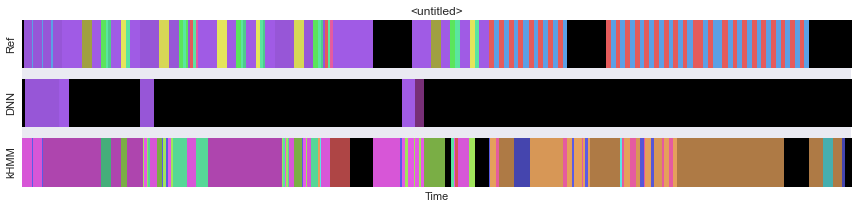

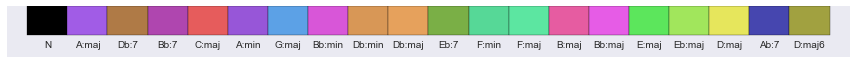

In [27]:
# Quad III
draw_gt_triple('TRVKOR')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.037859,0.038142,0.037859,0.024369,0.024369,0.037859,0.037859,0.024369
kHMM,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911


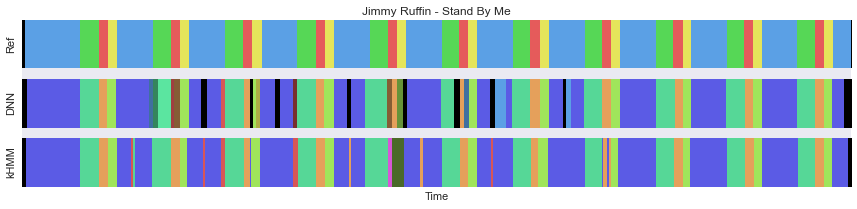

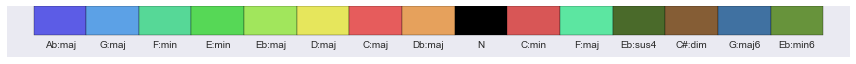

In [28]:
# Quad III
draw_gt_triple('TRFZJJ')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.347599,0.233165,0.210360,0.427151,0.210360,0.210360,0.210360,1.000000
kHMM,0.344219,0.216579,0.216579,0.422998,0.208315,0.216579,0.216579,0.966189


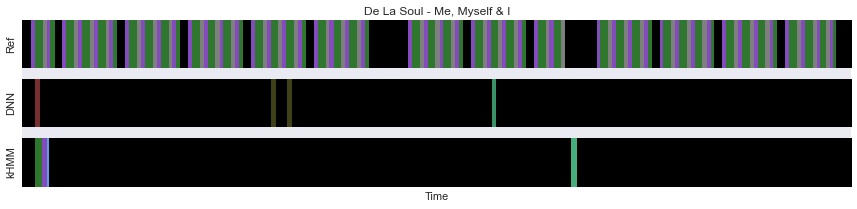

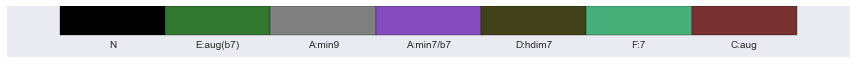

In [29]:
# Quad II
draw_gt_triple('TRDQBX')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.666440,0.755504,0.769295,0.631059,0.631059,0.666440,0.666440,0.627723
kHMM,0.789198,0.789198,0.789198,0.789198,0.789198,0.789198,0.789198,0.787439


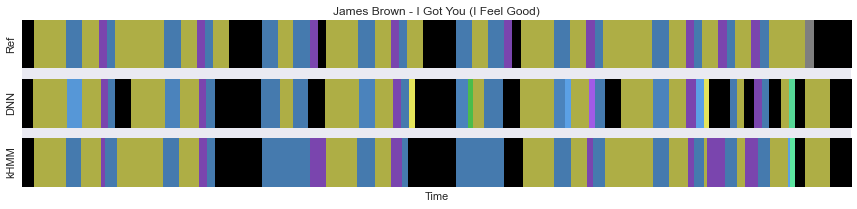

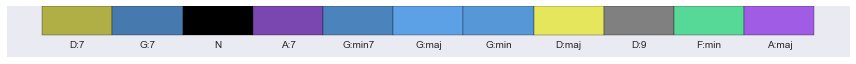

In [30]:
# Quad II
draw_gt_triple('TRNLPUN149E3F193B1')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,1.000000,1.000000,0.685070,1.000000,0.685070,0.685070,0.685070,1.000000
kHMM,0.549764,0.549764,0.376627,0.549764,0.376627,0.376627,0.376627,0.549764


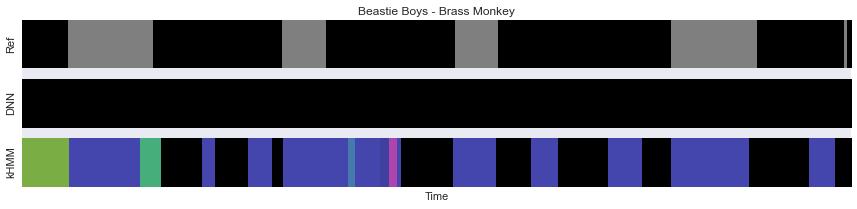

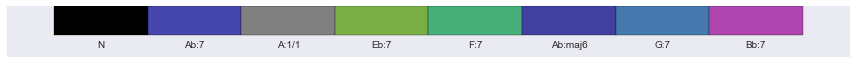

In [31]:
# Quad II
draw_gt_triple('TREIIMT149E3789BE9')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.555842,0.567419,0.561044,0.446705,0.446705,0.555842,0.555842,0.446705
kHMM,0.775111,0.794027,0.778544,0.565591,0.565591,0.777242,0.775111,0.565591


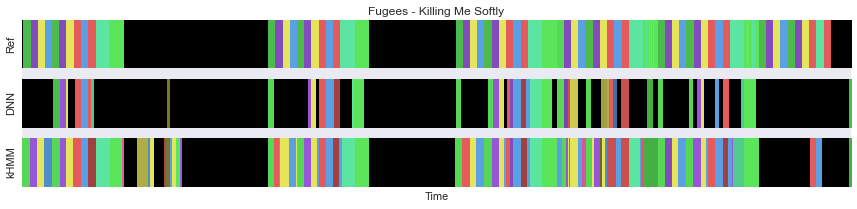

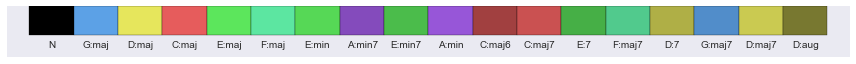

In [32]:
# Quad II
draw_gt_triple('TRKNQAL127F99CC717')

## Enter, the Rock Corpus

Much can and has been said about the consistency, and thus quality, of the annotations used for development and evaluation of chord estimation systems. The majority of human-provided chord annotations are often singular, either being performed by one person or as the result of a review process to resolve disagreements.

The notion of annotator disagreements is an interesting one, because there are two reasons why this might occur. The first is simply a matter of human error, typos and the like. The second, and far more interesting cause, is that there is some ambiguity in the musical content, leading to different acceptable annotations.

Since most dataset curation efforts have made an explicit effort to iron out these discrepancies, it isn't possible to explore any such instances in the data used so far. The Rock Corpus, however, does afford this opportunity. The collection contains 200 popular songs from the last several decades, each annotated by two music experts: one, a pianist, and the other, a guitarist. This background adds an interesting dimension to the inquiry, when considering points of aggrement or disagreement between annotators and algorithmic methods.

In [33]:
rock_jams = ace_tools.load_jamset_v2("data/rock_corpus/annotations/references/references.jv2")
DNN0_jams = ace_tools.load_jamset_v2("data/rock_corpus/annotations/DNN/DNN0.jv2")
kHMM0_jams = ace_tools.load_jamset_v2("data/rock_corpus/annotations/kHMM/kHMM0.jv2")

In [34]:
DT_DNN0, DT_DNN0_W = ace_tools.util.load_results("data/rock_corpus/results/DNN/DT_DNN0.json")
TdC_DNN0, TdC_DNN0_W = ace_tools.util.load_results("data/rock_corpus/results/DNN/TdC_DNN0.json")
DT_kHMM0, DT_kHMM0_W = ace_tools.util.load_results("data/rock_corpus/results/kHMM/DT_kHMM0.json")
TdC_kHMM0, TdC_kHMM0_W = ace_tools.util.load_results("data/rock_corpus/results/kHMM/TdC_kHMM0.json")
DT_TdC, DT_TdC_W = ace_tools.util.load_results("data/rock_corpus/results/TdC/DT_TdC.json")
TdC_DT, TdC_DT_W = ace_tools.util.load_results("data/rock_corpus/results/DT/TdC_DT.json")

DT_TdC = DT_TdC.ix[DT_DNN0.index]
TdC_DT = TdC_DT.ix[DT_DNN0.index]

for res in [DT_DNN0, DT_kHMM0, TdC_DNN0, TdC_kHMM0, DT_TdC, TdC_DT]:
    res.sort_index(inplace=True)


In [35]:
cols = ['DT-TdC', 'TdC-DT', 'DT-DNN0', 
        'TdC-DNN0', 'DT-kHMM0', 'TdC-kHMM0']
ave_res = pd.concat([(DT_TdC * DT_TdC_W).sum() / DT_TdC_W.sum(), 
                     (TdC_DT * TdC_DT_W).sum() / TdC_DT_W.sum(), 
                     (DT_DNN0 * DT_DNN0_W).sum() / DT_DNN0_W.sum(), 
                     (TdC_DNN0 * TdC_DNN0_W).sum() / TdC_DNN0_W.sum(),
                     (DT_kHMM0 * DT_kHMM0_W).sum() / DT_kHMM0_W.sum(), 
                     (TdC_kHMM0 * TdC_kHMM0_W).sum() / TdC_kHMM0_W.sum()], 
                    axis=1)
ave_res.columns = cols
# print(ave_res.to_latex(float_format="{:0.4f}".format))
HTML(ave_res.to_html(float_format="{:0.4f}".format))

,DT-TdC,TdC-DT,DT-DNN0,TdC-DNN0,DT-kHMM0,TdC-kHMM0
majmin,0.8864,0.9027,0.6986,0.7118,0.7413,0.7527
mirex,0.9034,0.9020,0.7148,0.7267,0.7499,0.7659
root,0.9181,0.9312,0.7725,0.7861,0.8153,0.8302
sevenths,0.8247,0.8398,0.5066,0.5268,0.5579,0.5791
tetrads,0.8222,0.8340,0.5045,0.5238,0.5548,0.5751
thirds,0.8898,0.9026,0.7255,0.7381,0.7592,0.7721
triads,0.8843,0.8970,0.6956,0.7075,0.7373,0.7472
v157_strict,0.8222,0.8377,0.5045,0.5247,0.5548,0.5762


In [36]:
s_HA = pd.DataFrame(
    np.array([np.asarray(DT_TdC), np.asarray(TdC_DT),]).max(axis=0),
    index=DT_TdC.index, columns=DT_TdC.columns)

s_DNN = pd.DataFrame(
    np.array([np.asarray(DT_DNN0), np.asarray(TdC_DNN0),]).max(axis=0),
    index=DT_DNN0.index, columns=DT_DNN0.columns)

s_kHMM = pd.DataFrame(
    np.array([np.asarray(DT_kHMM0), np.asarray(TdC_kHMM0)]).max(axis=0),
    index=DT_kHMM0.index, columns=DT_kHMM0.columns)

df_HA = (s_HA * TdC_DT_W).sum() / TdC_DT_W.sum()
df_DNN = (s_DNN * DT_kHMM0_W).sum() / DT_kHMM0_W.sum()
df_kHMM = (s_kHMM * DT_kHMM0_W).sum() / DT_kHMM0_W.sum()

best_res = pd.concat([df_HA, df_DNN, df_kHMM], axis=1)
best_res.columns = ['Human', 'DNN', 'kHMM']
# print(best_res.to_latex(float_format="{:0.4f}".format))
HTML(best_res.to_html(float_format="{:0.4f}".format))

,Human,DNN,kHMM
majmin,0.9054,0.7227,0.7657
mirex,0.9024,0.7373,0.7757
root,0.9318,0.7923,0.8353
sevenths,0.8424,0.5424,0.5950
tetrads,0.8345,0.5395,0.5900
thirds,0.9031,0.7500,0.7845
triads,0.8975,0.7186,0.7602
v157_strict,0.8381,0.5393,0.5903


## Annotator Agreement versus Best Estimation

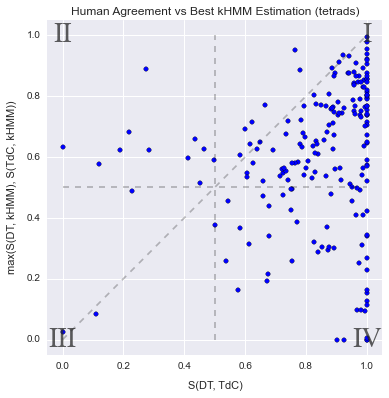

In [37]:
# Human agreement vs bestimation 
# S(DT, TdC) vs max(S(DT, kHMM), S(TdC, kHMM))
metric = 'tetrads'
X = DT_TdC[metric]
Ya, Yb = DT_kHMM0[metric], TdC_kHMM0[metric]
Y = pd.concat([Ya, Yb], axis=1).max(axis=1)

fig, ax = ace_tools.visualize.trackwise_scatter(X, Y, figsize=(6,6), voffset=50)
ax.set_title("Human Agreement vs Best kHMM Estimation ({0})".format(metric))
ax.set_xlabel("S(DT, TdC)")
ax.set_ylabel("max(S(DT, kHMM), S(TdC, kHMM))")
for n, l in enumerate(['I', 'II', 'III', 'IV']):
    ax.text(((n - 1) / 2) % 2, 1 - n/2, l, va='center', ha='center', 
            fontsize=28, fontname='Times New Roman', alpha=0.75)
if SAVE_FIGS:
    fig.savefig("paper/figs/human_agreement-vs-best_kHMM_est.pdf")

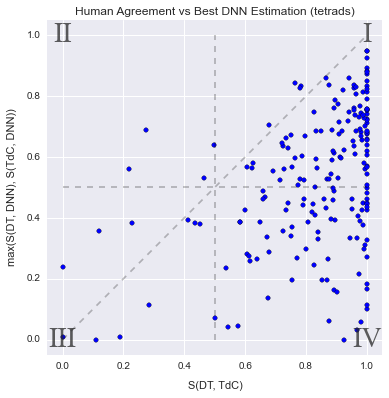

In [38]:
# Model agreement vs bestimation 
# S(DT, TdC) vs max(S(DT, DNN), S(TdC, DNN))
metric = 'tetrads'
X = DT_TdC[metric]
Ya, Yb = DT_DNN0[metric], DT_DNN0[metric]
Y = pd.concat([Ya, Yb], axis=1).max(axis=1)

fig, ax = ace_tools.visualize.trackwise_scatter(X, Y, figsize=(6,6), voffset=50)
ax.set_title("Human Agreement vs Best DNN Estimation ({0})".format(metric))
ax.set_xlabel("S(DT, TdC)")
ax.set_ylabel("max(S(DT, DNN), S(TdC, DNN))")
for n, l in enumerate(['I', 'II', 'III', 'IV']):
    ax.text(((n - 1) / 2) % 2, 1 - n/2, l, va='center', ha='center', 
            fontsize=28, fontname='Times New Roman', alpha=0.75)

if SAVE_FIGS:
    fig.savefig("paper/figs/human_agreement-vs-best_DNN_est.pdf")

In [39]:
# Make sure that all RC-Annotations have the correct duration.
for track_key in DNN0_jams:
    ma = DNN0_jams[track_key].annotations[0]
    intervals, labels = ma.data.to_interval_values()
    ma_duration = intervals.max()
    for idx, ha in enumerate(rock_jams[track_key].annotations):
        ha_intervals, ha_labels = ha.data.to_interval_values()
        ha_duration = ha_intervals.max()
        if ha_duration < ma_duration:
            ha.data.add_observation(
                time=ha_duration, duration=ma_duration-ha_duration, 
                value='N')

In [40]:
def draw_rc_quad(track_key, save=False):
    key = filter(lambda x:x.startswith(track_key), rock_jams.keys())[0]
    print(key, rock_jams[key].sandbox)
    stats = pd.DataFrame([DT_kHMM0.ix[key], TdC_kHMM0.ix[key]], index=['DT', 'TdC'])
    display(HTML("<h2>kHMM</h2>" + stats.to_html(float_format="{:0.4f}".format)))
    stats = pd.DataFrame([DT_DNN0.ix[key], TdC_DNN0.ix[key]], index=['DT', 'TdC'])
    display(HTML("<h2>DNN</h2>" + stats.to_html(float_format="{:0.4f}".format)))
    
    annots = [rock_jams[key].annotations[0], rock_jams[key].annotations[1],
              kHMM0_jams[key].annotations[0], DNN0_jams[key].annotations[0]]

    figs = ace_tools.visualize.plot_annotations(
        annots, ['DT', 'TdC', 'kHMM', 'DNN'], 
        (12, 3), (12, 1), vocab='soft')
    
    if save:
        figs[0].savefig("paper/figs/rc_{0}_annotations.pdf".format(key),
                        transparent=True)
        figs[1].savefig("paper/figs/rc_{0}_legend.pdf".format(key),
                        transparent=True)

        with open("paper/figs/rc_{0}_meta.json".format(key), 'w') as fp:
            json.dump(dict(stats=stats.to_dict(), 
                           **rock_jams[key].file_metadata), 
                      fp, indent=2)

TRTSMCF14A081529AF {
  "local_key": "dancing_in_the_street"
}


,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DT,0.9760,0.9760,0.9883,0.1963,0.1963,0.9883,0.9760,0.1963
TdC,0.9637,0.9637,0.9637,0.8895,0.8895,0.9637,0.9637,0.8895


,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DT,0.9677,0.9677,0.9937,0.6899,0.6899,0.9937,0.9677,0.6899
TdC,0.9677,0.9677,0.9686,0.2658,0.2658,0.9686,0.9677,0.2658


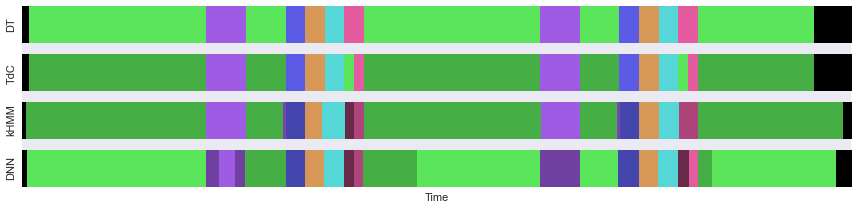

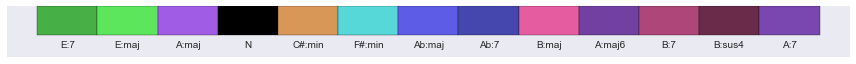

In [42]:
# Quad II
draw_rc_quad("TRTSM")

TRJAZCU14A0814BC9D {
  "local_key": "all_apologies"
}


,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DT,0.9613,0.9613,0.9842,0.4860,0.4860,0.9842,0.9613,0.4860
TdC,0.9613,0.9613,0.9842,0.6823,0.6823,0.9842,0.9613,0.6823


,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DT,0.9932,0.9932,0.9932,0.5612,0.5612,0.9932,0.9932,0.5612
TdC,0.9932,0.9932,0.9932,0.5153,0.5153,0.9932,0.9932,0.5153


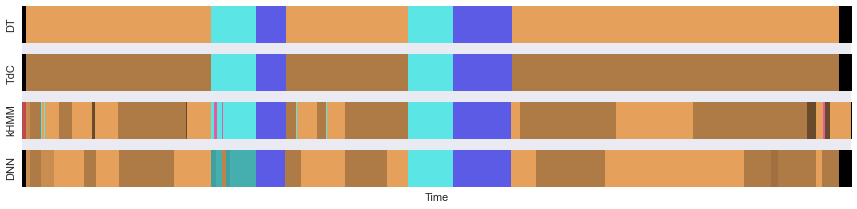

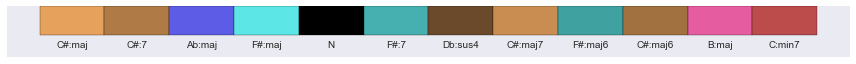

In [43]:
# Quad II
draw_rc_quad('TRJAZ')

TRMMZUK14A08299910 {
  "local_key": "i_got_you"
}


,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DT,0.7187,0.7187,0.7547,0.0106,0.0106,0.7187,0.7187,0.0106
TdC,0.7187,0.7187,0.7547,0.6325,0.6325,0.7187,0.7187,0.6325


,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DT,0.5664,0.5664,0.6419,0.0078,0.0078,0.5709,0.5664,0.0078
TdC,0.5664,0.6373,0.6419,0.5081,0.5081,0.5709,0.5664,0.5081


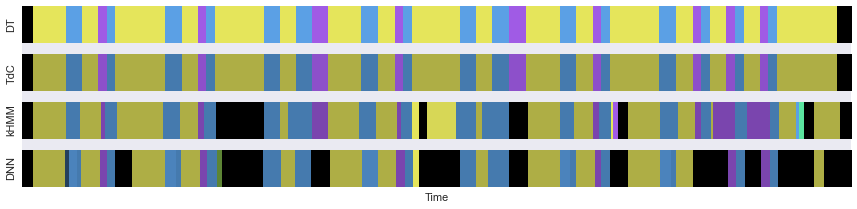

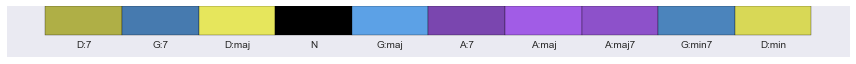

In [44]:
# Quad II
draw_rc_quad('TRMMZUK')

Observations:
* Experts don't agree, even after error-checking.
* There is asymmetry in chord comparisons! Depending on who gets used as the reference, a comparison may match better or worse.
* DT's vocabulary is a superset of TdC's, hence the consistent difference. 
* Even the MIREX score isn't perfect, which is surprising. Typically, one would think that the difficulty in naming a chord isn't identifying the contributing pitches, but spelling the name in the context of the piece. However, even humans aren't sure which pitches matter.

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.995829,0.995829,0.628518,0.925430,0.028490,0.628518,0.030658,0.925430
kHMM,0.909125,0.909125,0.890241,0.909125,0.027988,0.787716,0.027988,0.909125


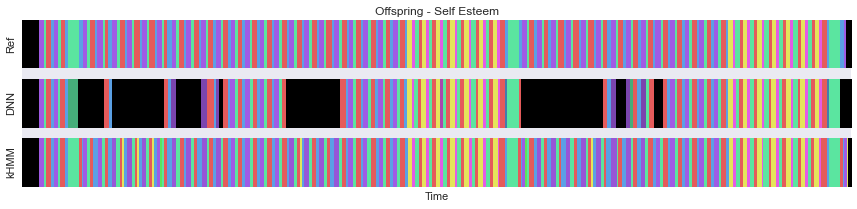

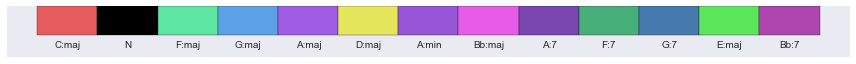

In [46]:
# Quad II
draw_gt_triple('TRDWPHA127FA2A2EF4')

,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.959561,0.959561,0.904792,0.832713,0.323367,0.707094,0.372626,0.832713
kHMM,0.934860,0.934860,0.880100,0.810829,0.314869,0.691931,0.363034,0.810829


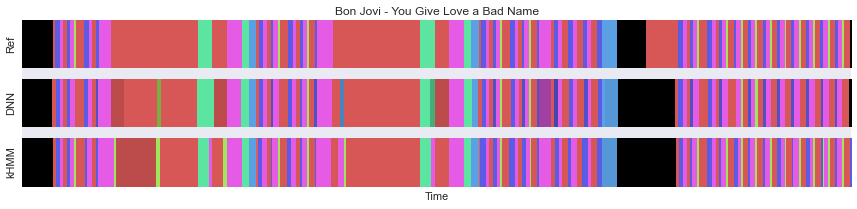

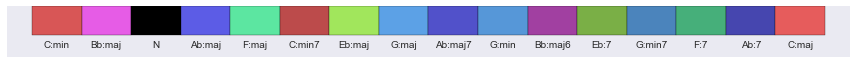

In [47]:
# Quad II
draw_gt_triple('TRFSVDX127F88E2C47')

In [48]:
multi_jams = dict()
for key, jam in all_jams.iteritems():
    if len(jam.annotations) > 1:
        multi_jams[key] = jam

In [49]:
common_keys = list(set(multi_jams.keys()).intersection(rock_jams.keys()))
for k in common_keys:
    print(k, multi_jams[k].sandbox)

TRVACGQ149E2CA49F8 {
  "weeks_on_chart": "13", 
  "chart_date": "1965-10-30", 
  "peak_rank": "1", 
  "actual_rank": "32", 
  "original_filename": "01_-_Help!", 
  "target_rank": "33", 
  "id": "1244"
}
TROSSUK149E3AE03BD {
  "weeks_on_chart": "11", 
  "chart_date": "1964-02-15", 
  "peak_rank": "14", 
  "actual_rank": "54", 
  "original_filename": "01_-_I_Saw_Her_Standing_There", 
  "target_rank": "56", 
  "id": "853"
}
TRYZFIJ149E3B7E68B {
  "weeks_on_chart": "18", 
  "chart_date": "1987-06-27", 
  "peak_rank": "1", 
  "actual_rank": "38", 
  "original_filename": "0681", 
  "target_rank": "38", 
  "id": "681"
}


TRVACGQ149E2CA49F8 {
  "jams_version": "0.2.0", 
  "title": "Help!", 
  "identifiers": {
    "audio_md5": "0652a66fef48a95647a7776f7bd5a2ed", 
    "echonest_song_id": "SOPISLM141E1AD7673", 
    "echonest_track_id": "TRVACGQ149E2CA49F8", 
    "md5": "0652a66fef48a95647a7776f7bd5a2ed"
  }, 
  "release": "Help!", 
  "duration": 141.11347, 
  "artist": "The Beatles"
}


,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.952849,0.952849,0.964484,0.861599,0.862767,0.952849,0.952849,0.862767
kHMM,0.916004,0.916004,0.924864,0.763292,0.766566,0.916004,0.916004,0.766566


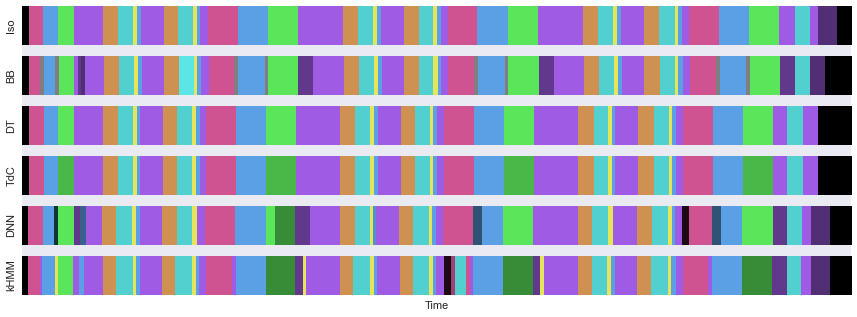

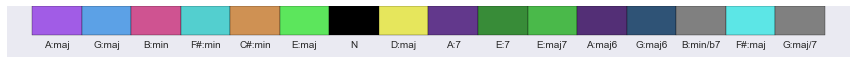

In [50]:
# Quad II
key = common_keys[0]
print(key, all_jams[key].file_metadata)
stats = pd.DataFrame([all_DNN_test.ix[key], all_kHMM_test.ix[key]], index=['DNN', 'kHMM'])
display(HTML(stats.to_html()))
 
annots = [multi_jams[key].annotations[0], multi_jams[key].annotations[1], 
          rock_jams[key].annotations[0], rock_jams[key].annotations[1], 
          DNN_test_jams[key].annotations[0], kHMM_test_jams[key].annotations[0]]
names = ['Iso', 'BB', 'DT', 'TdC', 'DNN', 'kHMM']
figs = ace_tools.visualize.plot_annotations(
    annots, names, (12, 4.5), (12, 1), vocab='strict', 
    max_length=None, max_idx=96, max_labels=16)

if SAVE_FIGS:
    figs[0].savefig("paper/figs/{0}_annotations.pdf".format(key),
                    transparent=True)
    figs[1].savefig("paper/figs/{0}_legend.pdf".format(key),
                    transparent=True)

    with open("paper/figs/{0}_meta.json".format(key), 'w') as fp:
        json.dump(dict(stats=stats.to_dict(), **all_jams[key].file_metadata), fp, indent=2)

TROSSUK149E3AE03BD {
  "jams_version": "0.2.0", 
  "title": "I Saw Her Standing There", 
  "identifiers": {
    "audio_md5": "f71cc76d97d21c8709f59d60849c4d43", 
    "echonest_song_id": "SOFJGFM12B20E5E497", 
    "echonest_track_id": "TROSSUK149E3AE03BD", 
    "md5": "f71cc76d97d21c8709f59d60849c4d43"
  }, 
  "release": "I Saw Her Standing There", 
  "duration": 175.8302, 
  "artist": "The Beatles"
}


,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
Ref-DNN,0.887316,0.939411,0.907673,0.284466,0.284466,0.899098,0.887316,0.296639
Ref-kHMM,0.904127,0.904127,0.904681,0.516582,0.516582,0.904127,0.904127,0.543808
DNN-kHMM,0.927452,0.898436,0.918743,0.651646,0.607907,0.910210,0.898436,0.607907
kHMM-DNN,0.898453,0.898453,0.918757,0.607974,0.607974,0.910226,0.898453,0.607974
DT-kHMM,0.934853,0.934853,0.934853,0.571012,0.571012,0.934853,0.934853,0.571012
TdC-kHMM,0.926534,0.926534,0.926534,0.579266,0.579266,0.926534,0.926534,0.579266
DT-DNN,0.937513,0.937513,0.955505,0.581067,0.581067,0.950734,0.937513,0.581067
TdC-DNN,0.929194,0.929194,0.947186,0.644394,0.644394,0.942415,0.929194,0.644394
DT-TdC,0.991681,0.991681,0.991681,0.625567,0.625567,0.991681,0.991681,0.625567
TdC-DT,0.991681,0.991681,0.991681,0.625567,0.625567,0.991681,0.991681,0.625567


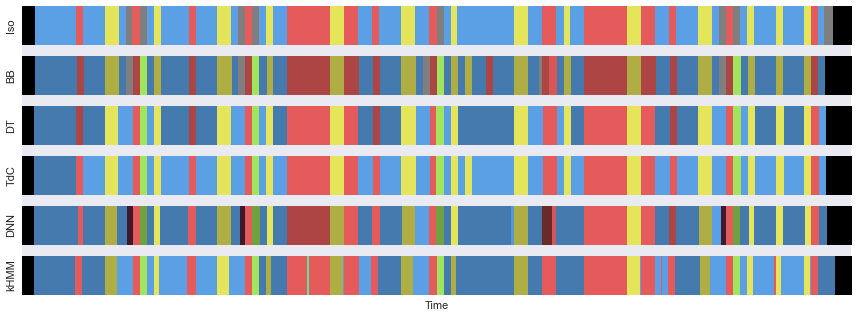

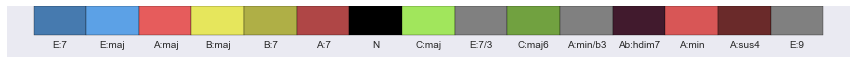

In [51]:
# Quad II
key = common_keys[1]
print(key, all_jams[key].file_metadata)
stats = pd.DataFrame(
    [all_DNN_test.ix[key], all_kHMM_test.ix[key],
     DNN_kHMM_test.ix[key], kHMM_DNN_test.ix[key], 
     DT_kHMM0.ix[key], TdC_kHMM0.ix[key],
     DT_DNN0.ix[key], TdC_DNN0.ix[key],
     DT_TdC.ix[key], TdC_DT.ix[key]], 
    index=['Ref-DNN', 'Ref-kHMM', 
           'DNN-kHMM', 'kHMM-DNN', 
           'DT-kHMM', 'TdC-kHMM',
           'DT-DNN', 'TdC-DNN',
           'DT-TdC', 'TdC-DT',])
display(HTML(stats.to_html()))
 
annots = [multi_jams[key].annotations[0], multi_jams[key].annotations[1], 
          rock_jams[key].annotations[0], rock_jams[key].annotations[1], 
          DNN_test_jams[key].annotations[0], kHMM_test_jams[key].annotations[0]]
names = ['Iso', 'BB', 'DT', 'TdC', 'DNN', 'kHMM']
figs = ace_tools.visualize.plot_annotations(
    annots, names, (12, 4.5), (12, 1), vocab='strict', 
    max_length=None, max_idx=156, max_labels=16, hue_offset=3)

if SAVE_FIGS:
    figs[0].savefig("paper/figs/{0}_annotations.pdf".format(key),
                    transparent=True)
    figs[1].savefig("paper/figs/{0}_legend.pdf".format(key),
                    transparent=True)

    with open("paper/figs/{0}_meta.json".format(key), 'w') as fp:
        json.dump(dict(stats=stats.to_dict(), **all_jams[key].file_metadata), fp, indent=2)

In [52]:
# Determine optimal intersection with human perspectives
x, y = ace_tools.util.align_chord_annotations(annots[4], annots[0])
refs = [ace_tools.util.align_chord_annotations(annots[4], a)[-1] for a in annots[:4]]
len(x), [len(r) for r in refs]
refs[-2].extend(['N']*56)
refs[-1].extend(['N']*56)

recall = 0
for a, b, c, d, e in zip(x, *refs):
    recall += int(a in [b, c, d, e])

recall / float(len(x))

0.8907849829351536

TRYZFIJ149E3B7E68B {
  "jams_version": "0.2.0", 
  "title": "With Or Without You", 
  "identifiers": {
    "audio_md5": "e57484782690d49bd010b435dc3aa639", 
    "echonest_song_id": "SOKXXMT144B757AC02", 
    "echonest_track_id": "TRYZFIJ149E3B7E68B", 
    "md5": "868c22950f8057f5bc0713f03e31f515"
  }, 
  "release": "U218 Singles", 
  "duration": 296.25469, 
  "artist": "U2"
}


,majmin,mirex,root,sevenths,tetrads,thirds,triads,v157_strict
DNN,0.832145,0.833942,0.861177,0.690774,0.569762,0.861177,0.791075,0.873021
kHMM,0.844836,0.854174,0.864857,0.546380,0.450663,0.862144,0.819152,0.735300


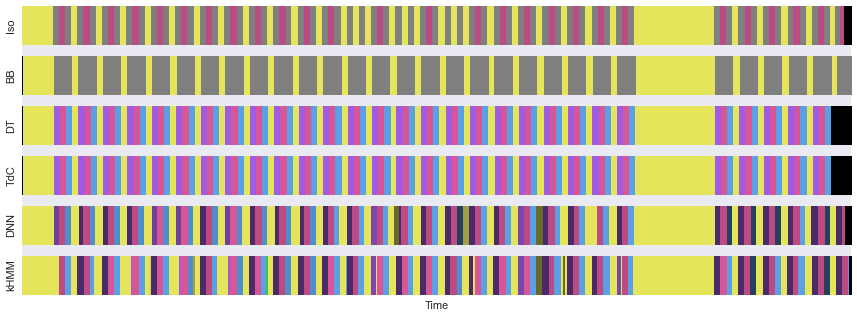

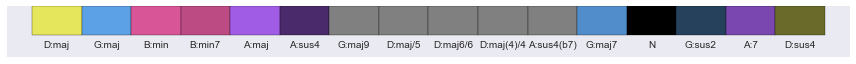

In [53]:
# Quad II
key = common_keys[2]
print(key, all_jams[key].file_metadata)
stats = pd.DataFrame([all_DNN_test.ix[key], all_kHMM_test.ix[key]], index=['DNN', 'kHMM'])
display(HTML(stats.to_html()))
 
annots = [multi_jams[key].annotations[0], multi_jams[key].annotations[1], 
          rock_jams[key].annotations[0], rock_jams[key].annotations[1], 
          DNN_test_jams[key].annotations[0], kHMM_test_jams[key].annotations[0]]
names = ['Iso', 'BB', 'DT', 'TdC', 'DNN', 'kHMM']
figs = ace_tools.visualize.plot_annotations(
    annots, names, (12, 4.5), (12, 1), vocab='strict', 
    max_length=None, max_idx=156, max_labels=16, hue_offset=0)

if SAVE_FIGS:
    figs[0].savefig("paper/figs/{0}_annotations.pdf".format(key),
                    transparent=True)
    figs[1].savefig("paper/figs/{0}_legend.pdf".format(key),
                    transparent=True)

    with open("paper/figs/{0}_meta.json".format(key), 'w') as fp:
        json.dump(dict(stats=stats.to_dict(), **all_jams[key].file_metadata), fp, indent=2)